In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
import pandas as pd
import os

# Functions

In [3]:
def N_fI(N_f, A_I, e):
    gamma = 1 / (1 + np.exp(-e))
    return ((A_I + N_f)*(1-gamma) + gamma- 
            np.sqrt(-4 * A_I * N_f * (1 - gamma) 
                    + ((A_I + N_f)*(1- gamma) + gamma)**2)) / (2 * (1 - gamma))

def N_dI(N_f, N_d, A_I, e):
    gamma = 1 / (1 + np.exp(-e))
    return (-A_I * N_d + (A_I * N_d) / (2 * (1 - gamma)) + (N_f * N_d) / (2 * (1 - gamma)) + (N_d * gamma) / (2 * (1 - gamma)) - (A_I * N_d * gamma) / (2 * (1 - gamma)) - (N_f * N_d * gamma) / (2 * (1 - gamma)) - (N_d * np.sqrt(-4 * A_I * N_f * (1 - gamma) + (A_I + N_f + gamma - A_I * gamma - N_f * gamma)**2)) / (2 * (1 - gamma)))/(N_f-1)

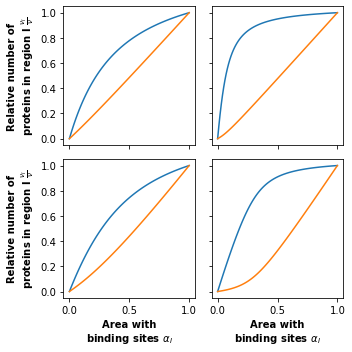

In [6]:
A_I_vals = np.linspace(0, 1, 100)

fig, axes = plt.subplots(2, 2, figsize=(5, 5), sharex=True, sharey=True)

# === Plot 1 ===
Nf, Nd, epsilon = 0.05, 0.05, -1
ax = axes[0, 0]
ax.plot(A_I_vals, N_fI(Nf, A_I_vals, epsilon)/Nf, label=r'$\frac{\nu_{f,I}}{\nu_f}$')
ax.plot(A_I_vals, N_dI(Nf, Nd, A_I_vals, epsilon)/Nd, label=r'$\frac{\nu_{d,I}}{\nu_d}$')

# === Plot 2 ===
epsilon = -3
ax = axes[0, 1]
ax.plot(A_I_vals, N_fI(Nf, A_I_vals, epsilon)/Nf, label=r'$\frac{\nu_{f,I}}{\nu_f}$')
ax.plot(A_I_vals, N_dI(Nf, Nd, A_I_vals, epsilon)/Nd, label=r'$\frac{\nu_{d,I}}{\nu_d}$')

# === Plot 3 ===
Nf, Nd, epsilon = 0.2, 0.2, -1
ax = axes[1, 0]
ax.plot(A_I_vals, N_fI(Nf, A_I_vals, epsilon)/Nf, label=r'$\frac{\nu_{f,I}}{\nu_f}$')
ax.plot(A_I_vals, N_dI(Nf, Nd, A_I_vals, epsilon)/Nd, label=r'$\frac{\nu_{d,I}}{\nu_d}$')

# === Plot 4 ===
Nf, Nd, epsilon = 0.3, 0.3, -3
ax = axes[1, 1]
ax.plot(A_I_vals, N_fI(Nf, A_I_vals, epsilon)/Nf, label=r'$\frac{\nu_{f,I}}{\nu_f}$')
ax.plot(A_I_vals, N_dI(Nf, Nd, A_I_vals, epsilon)/Nd, label=r'$\frac{\nu_{d,I}}{\nu_d}$')

# === Axis labels (only on bottom row and left column) ===
for i in range(2):
    axes[1, i].set_xlabel('Area with\n' + r'binding sites $\alpha_I$', fontweight='bold')
    axes[i, 0].set_ylabel('Relative number of\n' + r'proteins in region I $\frac{\nu_I}{\nu}$', fontweight='bold')

# === Final layout and export ===
fig.tight_layout()
plt.savefig('figures/number_equilibrium_all.svg', dpi=300)
plt.show()
